In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import pickle


# Creating the Testing Data

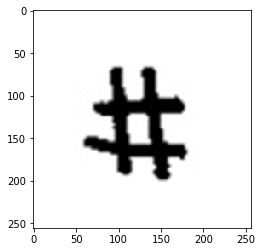

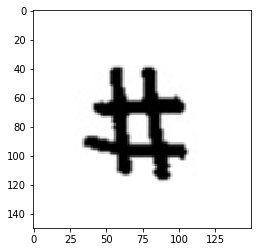

100%|████████████████████████████████████████████████████████████████████████████████| 259/259 [00:03<00:00, 73.83it/s]


4454


In [6]:
DATADIR = r"C:\Users\Josh\Desktop\Thesis Data\Testing Data"


CATEGORIES = ["Sharp", "Flat","Minim","8thRest","16thRest","32ndRest","Accent","AltoClef",
              "BassClef","Beam1","Crochet", "Natural","QuarterRest",
             "Quaver","Slur","Staccatissimo","Ties","TrebleClef"]


#CATEGORIES = ["trebleClef"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    
    
    
    
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

print(len(testing_data))

import random

random.shuffle(testing_data)



In [7]:
X = []
y = []

for features,label in testing_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)





[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[  1]
   [  4]
   [  4]
   ...
   [255]
   [255]
   [255]]

  [[  2]
   [  0]
   [ 27]
   ...
   [255]
   [255]
   [255]]

  [[  2]
   [ 47]
   [123]
   ...
   [255]
   [255]
   [255]]]]


In [8]:

#SAVING TESTING VALUES
pickle_out = open("x_test.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


##LOADING TESTING DATA
pickle_in = open("x_test.pickle","rb")
X_test = pickle.load(pickle_in)
X_test = X_test/255.0
pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)



# LOADING TRAINING DATA
pickle_in = open("X.pickle","rb")
X_train = pickle.load(pickle_in)
X_train = X_train/255.0

pickle_in = open("y.pickle","rb")
y_train = pickle.load(pickle_in)


# Loading the Saved Neural Network 

In [11]:
model = tf.keras.models.load_model('FullClassifier.model') 

In [ ]:
#val_loss, val_acc = model.evaluate(X_test, y_test)
NAME = 'classifer'
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
#model.fit(X_test, y_test, epochs=1)
model.fit(X_test,y_test, epochs=1, callbacks=[tensorboard])

Epoch 1/1
2176/4454 [=============>................] - ETA: 28:48 - loss: 0.3615 - acc: 0.87 - ETA: 23:54 - loss: 0.6337 - acc: 0.82 - ETA: 21:38 - loss: 0.6599 - acc: 0.84 - ETA: 20:35 - loss: 0.6691 - acc: 0.82 - ETA: 19:54 - loss: 0.8647 - acc: 0.81 - ETA: 19:23 - loss: 0.9664 - acc: 0.81 - ETA: 18:49 - loss: 0.9487 - acc: 0.83 - ETA: 18:30 - loss: 0.9058 - acc: 0.83 - ETA: 18:14 - loss: 0.8708 - acc: 0.84 - ETA: 18:14 - loss: 0.8846 - acc: 0.83 - ETA: 18:16 - loss: 0.8587 - acc: 0.82 - ETA: 18:10 - loss: 0.8587 - acc: 0.82 - ETA: 17:56 - loss: 0.8281 - acc: 0.82 - ETA: 17:39 - loss: 0.8395 - acc: 0.82 - ETA: 17:27 - loss: 0.8225 - acc: 0.82 - ETA: 17:22 - loss: 0.8559 - acc: 0.81 - ETA: 17:08 - loss: 0.8439 - acc: 0.81 - ETA: 16:54 - loss: 0.8545 - acc: 0.81 - ETA: 16:42 - loss: 0.8816 - acc: 0.81 - ETA: 16:33 - loss: 0.8624 - acc: 0.81 - ETA: 16:25 - loss: 0.8627 - acc: 0.81 - ETA: 16:17 - loss: 0.8563 - acc: 0.81 - ETA: 16:06 - loss: 0.8502 - acc: 0.81 - ETA: 15:58 - loss: 0.8354

In [48]:
vl = val_loss
va = val_acc
print("\n\nThe value loss of the classified images are: " + str(vl) + "%" + "\nWhile the accuracy is: " + "%" + str(va))



The value loss of the classified images are: 16.11809730529785%
While the accuracy is: %0.0


In [54]:
print(val_loss)
print(val_acc)

14.423902688203034
0.0
